# ESERCIZIO DI APPLICAZIONE DEL PROCESS MINING

## Process Mining

Per process mining si intende quella tecnica che permette, partendo dagli event logs, di mappare un processo con l'obiettivo di individuare colli di bottiglia, così come loops o deviazioni non volute nel porcesso. 
In linea general eil process mining può essere definito come quello **strumento che permette di ottenere informazioni su un processo partendo da dei EVENT DATA generati durante l'esecuzione di un processo.**
in linea generale le caratteristiche che devono avere gli event data sono: numero identificativo, descrizione dell'attività, time-stamp o identificativo temporale.
Guardando alle fasi di cui si compone il processo abbiamo 3 fasi: 

1. PROCESS DISCOVERY
      * Per process discovery si intende la mappatura del processo reale attraverso gli "event logs";
2. CONFORMANCE CHECKING
      * Verifico la presenza di deviazioni, così come discostamenti dal processo originale;
3. PROCESS ENHANCEMENT
      * In questa fase è previsto il potenziamento del processo, andando ad eliminare i problemi individuati

In [17]:
import pandas as pd
import pm4py 

## CARICAMENTO DATI CSV

In [18]:
df = pd.read_csv("running-example.csv", sep = ";")
df

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara
5,3,examine thoroughly,2011-01-06 13:06:00+01:00,400,Sean
6,3,check ticket,2011-01-08 11:43:00+01:00,100,Pete
7,3,decide,2011-01-09 09:55:00+01:00,200,Sara
8,3,pay compensation,2011-01-15 10:45:00+01:00,200,Ellen
9,2,register request,2010-12-30 11:32:00+01:00,50,Mike


Loading an event log stored in a CSV file and computing the number of cases and the number of events in the file. Con questo script non faccio altro che verificare qual'è il numero degli event e dei case. Ma non mi è possibile utilizzare questi dati per i miei algoritmi di process mining.

In [19]:
def import_csv(file_path):
    event_log = pd.read_csv(file_path, sep=';')
    num_events = len(event_log)
    num_cases = len(event_log.case_id.unique())
    print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))


if __name__ == "__main__":
    import_csv("running-example.csv")

Number of events: 42
Number of cases: 6


Esiste un modo che mi permette di importare un event log da un file csv, ma che allo stesso tempo mi permetterà di utilizzarlo per i miei algoritmi di process mining.

In [21]:
dfcsv = pm4py.format_dataframe(pd.read_csv("running-example.csv", sep = ";"), case_id='case_id', activity_key='activity', timestamp_key='timestamp')
dfcsv

/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  """Entry point for launching an IPython kernel.


,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0
1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,1,examine thoroughly,2010-12-31 09:06:00+00:00,1,0
2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,1,check ticket,2011-01-05 14:12:00+00:00,2,0
3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,1,decide,2011-01-06 10:18:00+00:00,3,0
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,1,reject request,2011-01-07 13:24:00+00:00,4,0
5,2,register request,2010-12-30 10:32:00+00:00,50,Mike,2,register request,2010-12-30 10:32:00+00:00,5,1
6,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,2,check ticket,2010-12-30 11:12:00+00:00,6,1
7,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,2,examine casually,2010-12-30 13:16:00+00:00,7,1
8,2,decide,2011-01-05 10:22:00+00:00,200,Sara,2,decide,2011-01-05 10:22:00+00:00,8,1
9,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,2,pay compensation,2011-01-08 11:05:00+00:00,9,1


## CARICAMENTO DATI XES

In [22]:
if __name__ == "__main__":
    df = pm4py.read_xes("running-example.xes")
    
df

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
0,register request,2010-12-30 11:02:00+00:00,50,Pete,14,1
1,examine thoroughly,2010-12-31 10:06:00+00:00,400,Sue,15,1
2,check ticket,2011-01-05 15:12:00+00:00,100,Mike,16,1
3,decide,2011-01-06 11:18:00+00:00,200,Sara,17,1
4,reject request,2011-01-07 14:24:00+00:00,200,Pete,18,1
5,register request,2010-12-30 11:32:00+00:00,50,Mike,9,2
6,check ticket,2010-12-30 12:12:00+00:00,100,Mike,10,2
7,examine casually,2010-12-30 14:16:00+00:00,400,Sean,11,2
8,decide,2011-01-05 11:22:00+00:00,200,Sara,12,2
9,pay compensation,2011-01-08 12:05:00+00:00,200,Ellen,13,2


## PROCESS DISCOVERING

Un elemento da tenere in considerazione è che una volta arrivato a questo punto, noi riusciamo ad osservare gli event log, ovvero siamo in grado di vedere e comprendere il dataset iniziale, ma non sappiamo come è stato strutturato originariamente il processo (la mappina che ci permette di capire come un processo è stato concettualmente pensato). Per poter dare uno sguardo iniziale a come è strutturato un processo, è possibile utilizzare l'algoritmo "discovery" nella prima riga del successivo codice. "bpm" è il target type of model. 

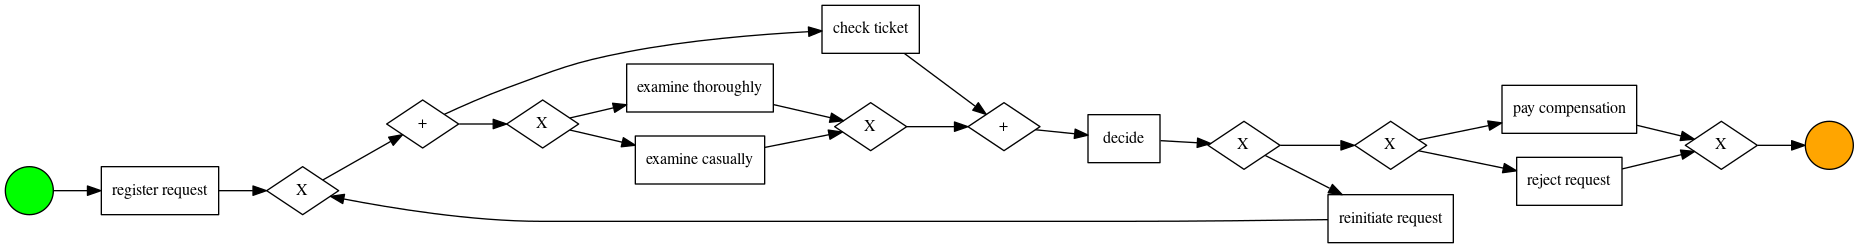

In [23]:
bpmn_model = pm4py.discover_bpmn_inductive(df)
pm4py.view_bpmn(bpmn_model)

Per poter interpretare al meglio il diagramma, va sottolineato che il rombo contente la X identifica una scelta: non è possibile eseguire contemporaneamente le azioni successive, bensì è necessario effettuare una scelta mutualmente esclusiva. Al contrario, Il rombo al cui interno vi è un + individua la possibilità che le azioni immediatamente successive siano eseguite contemporaneamente. Nel grafico in questione, la X consente o "examine casually" o "examine thoroughly", non permette di eseguire contemporaneamente queste azioni. Al contrario il + consente di eseguire contemporaneamente sia "check ticket" che eseguire una delle due azioni mutualmente esclusive discusse in precedenza.

## Process trees

-- DESCRZIONE DEL PROCESS TREE --

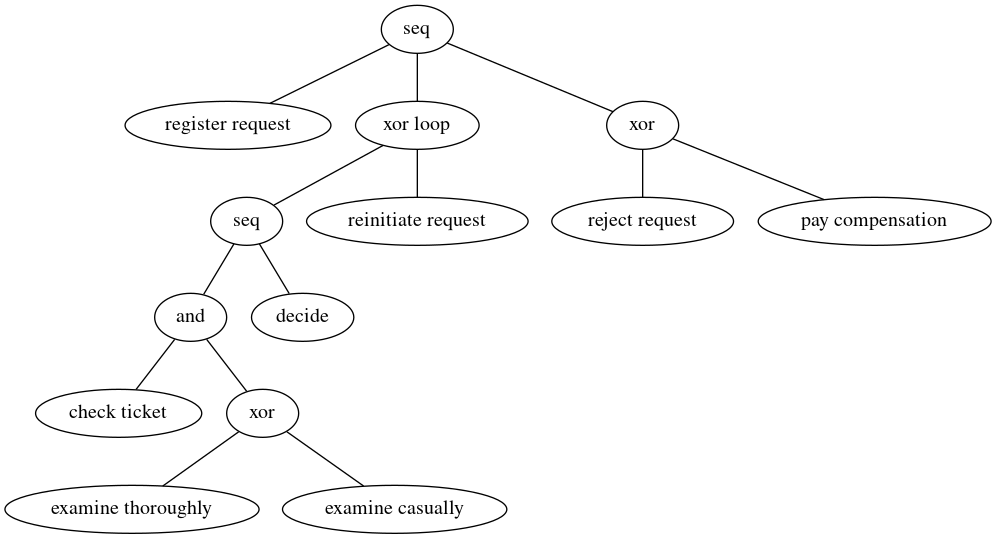

In [25]:
process_tree = pm4py.discover_process_tree_inductive(df)
pm4py.view_process_tree(process_tree)

Un process tree è una rappresentazione grafica che definisce la struttura e il funzionamento di un determinato processo. Esso è composto da dei nodi e da dei rami, dove da ogni nodo possono partire diversi rami che portano, a partire dal nodo iniziale, a diverse attività. I nodi interni sono chiamati operatori in quanto loro non fanno altro che descrivere dei behaviors. Nello specifico esistono 4 tipi diversi di behaviors:
1. Choice behavior
2. Sequential behavior
3. Concurrent behavior
4. Loop behavior

Il modo corretto per interpretare un process tree rispetto a un diagramma BPMN è spiegato dall'immagine che segue:

![ProcessTree](./immagini/ProcessTree.PNG)

## Petri Nets

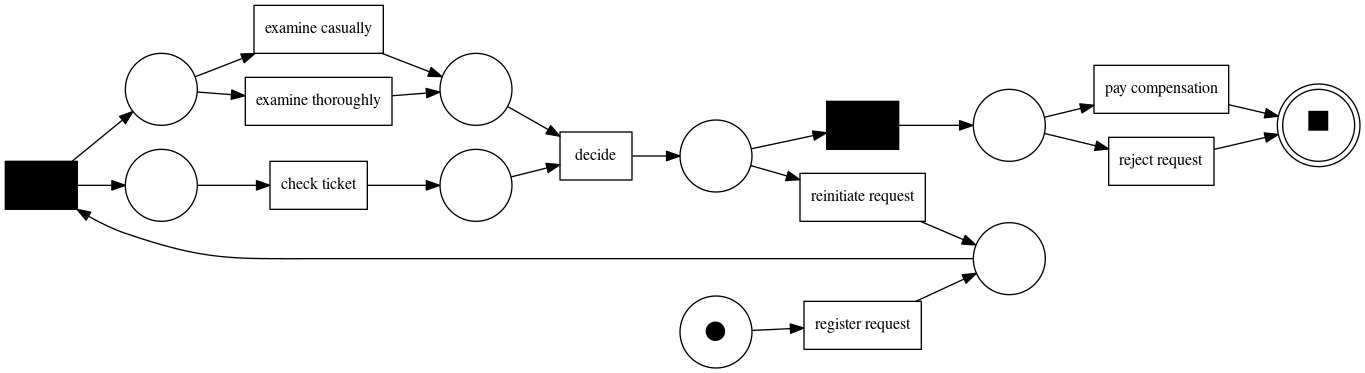

In [30]:
net1, im1, fm1 = pm4py.convert_to_petri_net(process_tree) #in questo caso il diagramma di Petri Net è stato ottenuto converendo il process tree
pm4py.view_petri_net(net1, im1, fm1)

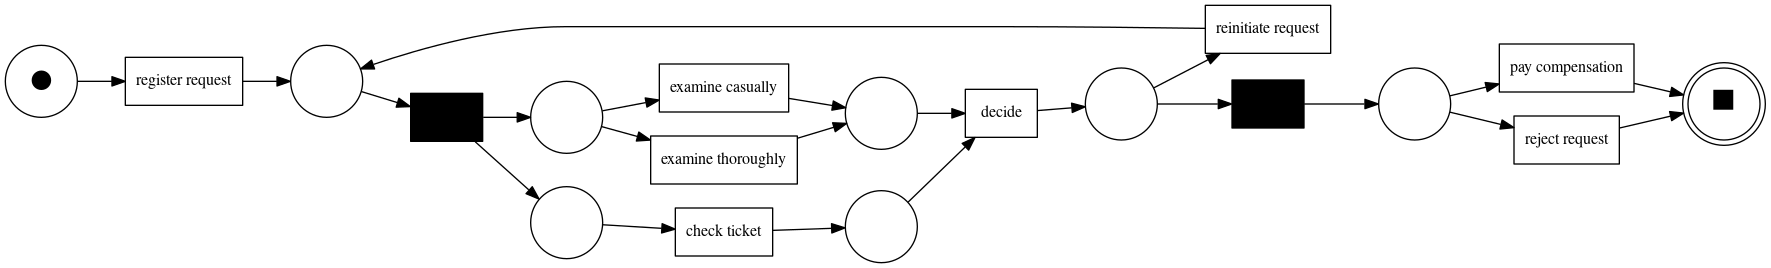

In [33]:
net2, im2, fm2 = pm4py.discover_petri_net_inductive(df) #il grafico Petri Net in questo caso è stato ottenuto direttamente dagli event log
pm4py.view_petri_net(net2, im2, fm2)

Nel diagramma di Petri Net 
* I rettangoli rappresentano le attività
* I rettangoli neri rappresentano un'azione non osservabile
* I cerchi rappresentano delle transizioni

## ALPHA DISCOVER 

Esiste un'altra tipologia di algoritmi che permettono di mappare un determinato processo, sono gli algoritmi alpha discover, ovvero l'alpha discover e l'alpha plus discover. Il difetto dell'alpha discover è che non permette di identificare i black box.

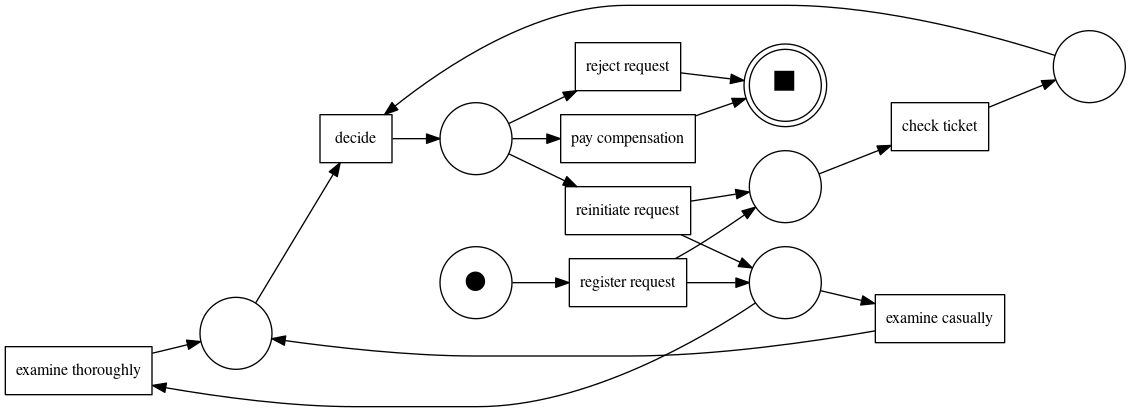

In [32]:
net3, im3, fm3 = pm4py.discover_petri_net_alpha(df) #il grafico Petri Net in questo caso è stato ottenuto direttamente dagli event log
pm4py.view_petri_net(net3, im3, fm3)

/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecatedWarning: discover_petri_net_alpha_plus is deprecated as of 2.3.0 and will be removed in 3.0.0. this method will be removed in a future release.
  """Entry point for launching an IPython kernel.


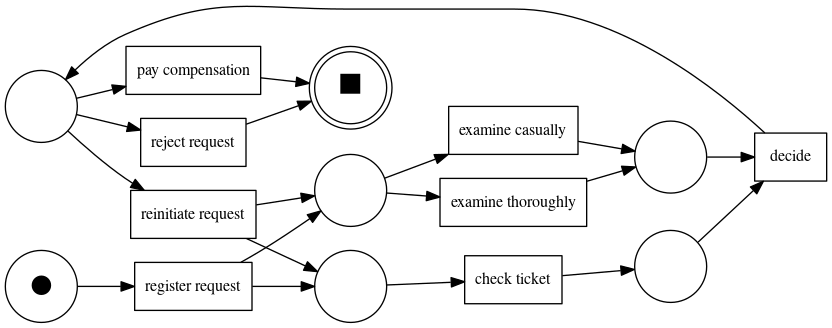

In [34]:
net4, im4, fm4 = pm4py.discover_petri_net_alpha_plus(df) #il grafico Petri Net in questo caso è stato ottenuto direttamente dagli event log
pm4py.view_petri_net(net4, im4, fm4)

## PROCESS MAPS 

Nella realtà, i diagrammi rappresentati precedentemente non sono molto utilizzati. Infatti di solito vengono utilizzati quelli che vengono chiamati process maps, in particolar modo i Process Flow maps. Questo perchè non solo permettono di mappare il processo, ma in oltre permettono di individuare i flussi, le attività coinvolte, nonchè le deciaioni prese lungo il percorso.

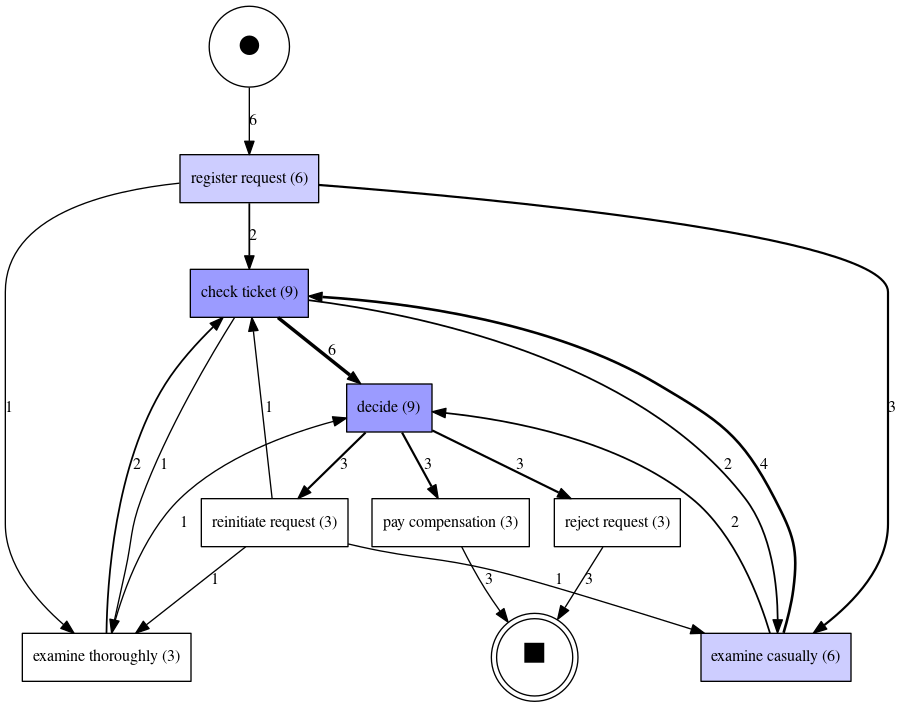

In [35]:
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

Per poter interpretare correttamente questo diagramma bisogna ricordare i seguenti punti:
* il numero nella freccia indica quante volte l'attività che segue è stata eseguita successivamemte all'attività che la precede;
* il numero all'interno dell'attività indica quante volte quella attività è stata eseguita. 
* le frecce indicano la direzione del flusso delle attività

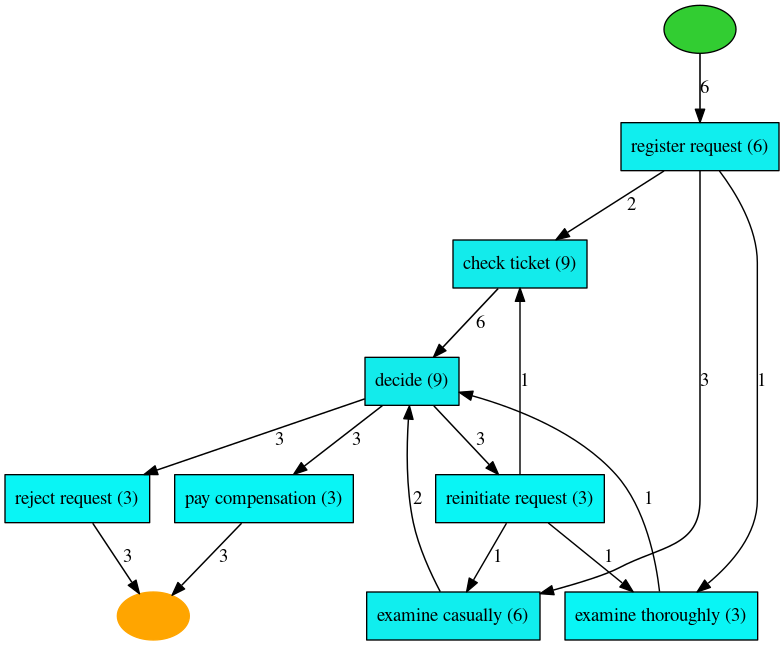

In [36]:
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)

## RIFLESSIONI FINALI

Nella realtà difficilmente ci si trova davanti a situazioni semplici come quella mostrata in precedenza. Questo perchè ogni singola attività può richiederne delle altre a un livello più profondo. 

![Cattura](./immagini/Cattura.PNG)

Un altro probelma che si può riscontrare nella realtà è che questa tipologia di algoritmi non riescono a distinguere autonomamente le medesime attività ma che vengono compiute in contesti diversi (basti pensare a fare la doccia al mattino e dopo aver fatto sport). Questo può indurre in errore nella mappatura e nell'interpretazione del processo. Infatti l'algoritmo creerà loop e lookback al fine di unificare medesime attività ma che in realtà andrebbero contestualizzate e identificate come differenti.
Un altro elemento che può indurre in errore è la durata delle attività. Questo perchè nella realtà ogni attività ha una sua durata e questo può portare ad errore, perchè l'introduzione di una durata diversa delle attività può spesso indurre in errore gli algoritmi precedentemente indicati.